# FHV Trip Data V2

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestRegressor

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data = 'C:/Users/cwnos/Documents/DSC630/Final Project/fhvhv_tripdata_2020-02.csv'

In [3]:
TextFileReader = pd.read_csv(data, chunksize=500000)  # the number of rows per chunk

dfList = []
for df in TextFileReader:
    dfList.append(df)

df = pd.concat(dfList,sort=False)

In [4]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y/%m/%d')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'], format='%Y/%m/%d')

In [5]:
df['Duration (seconds)'] = df['dropoff_datetime'] - df['pickup_datetime']

df['Duration (seconds)'] = df['Duration (seconds)'] / np.timedelta64(1,'s')

In [6]:
#df['mean_seconds'] = df['Duration (seconds)'].mean()
#df['median_seconds'] = df['Duration (seconds)'].median()

In [7]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

In [8]:
day_mapping = {0:'Monday',
              1:'Tuesday',
              2:'Wednesday',
              3:'Thursday',
              4:'Friday',
              5:'Saturday',
              6:'Sunday'}

df['day_name'] = df['pickup_datetime'].dt.weekday.map(day_mapping)

In [9]:
provider_mapping = {'HV0003': 'Uber',
                   'HV0005': 'Lyft',
                   'HV0002': 'Juno',
                   'HV0004': 'Via'}

df['provider'] = df['hvfhs_license_num'].map(provider_mapping)

In [10]:
df.head()

,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,Duration (seconds),year,month,day,day_of_week,hour,day_name,provider
0,HV0003,B02872,2020-02-01 00:06:20,2020-02-01 00:11:41,107,114,NaN,321.0,2020,2,1,5,0,Saturday,Uber
1,HV0003,B02872,2020-02-01 00:27:49,2020-02-01 00:46:37,249,263,NaN,1128.0,2020,2,1,5,0,Saturday,Uber
2,HV0003,B02872,2020-02-01 00:47:37,2020-02-01 01:03:17,263,41,NaN,940.0,2020,2,1,5,0,Saturday,Uber
3,HV0003,B02682,2020-02-01 00:10:26,2020-02-01 00:34:57,4,88,NaN,1471.0,2020,2,1,5,0,Saturday,Uber
4,HV0003,B02764,2020-02-01 00:48:56,2020-02-01 00:57:37,161,162,NaN,521.0,2020,2,1,5,0,Saturday,Uber


In [11]:
df = df.drop(['hvfhs_license_num', 'dispatching_base_num', 'dropoff_datetime', 'PULocationID','DOLocationID','SR_Flag'], axis = 1)



In [12]:
df.head()

,pickup_datetime,Duration (seconds),year,month,day,day_of_week,hour,day_name,provider
0,2020-02-01 00:06:20,321.0,2020,2,1,5,0,Saturday,Uber
1,2020-02-01 00:27:49,1128.0,2020,2,1,5,0,Saturday,Uber
2,2020-02-01 00:47:37,940.0,2020,2,1,5,0,Saturday,Uber
3,2020-02-01 00:10:26,1471.0,2020,2,1,5,0,Saturday,Uber
4,2020-02-01 00:48:56,521.0,2020,2,1,5,0,Saturday,Uber


In [13]:
df.describe()

,Duration (seconds),year,month,day,day_of_week,hour
count,2.172486e+07,21724865.0,21724865.0,2.172486e+07,2.172486e+07,2.172486e+07
mean,1.063378e+03,2020.0,2.0,1.518129e+01,3.281599e+00,1.363643e+01
std,7.270811e+02,0.0,0.0,8.483899e+00,1.949214e+00,6.478220e+00
min,0.000000e+00,2020.0,2.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.570000e+02,2020.0,2.0,8.000000e+00,2.000000e+00,9.000000e+00
50%,8.810000e+02,2020.0,2.0,1.500000e+01,4.000000e+00,1.500000e+01
75%,1.368000e+03,2020.0,2.0,2.200000e+01,5.000000e+00,1.900000e+01
max,8.489400e+04,2020.0,2.0,2.900000e+01,6.000000e+00,2.300000e+01


In [14]:
# Subsetting DF to include only rides that are at least 3 minutes and less than 1 hour and provider is either Uber or Lyft.

df = df.loc[(df['Duration (seconds)'].ge(60)) & (df['Duration (seconds)'].lt(2700)) & ((df['provider'] == 'Uber') | (df['provider'] == 'Lyft'))] 

In [15]:
df.describe()

,Duration (seconds),year,month,day,day_of_week,hour
count,2.034790e+07,20347895.0,20347895.0,2.034790e+07,2.034790e+07,2.034790e+07
mean,9.751035e+02,2020.0,2.0,1.517528e+01,3.307395e+00,1.362295e+01
std,5.558531e+02,0.0,0.0,8.491344e+00,1.953563e+00,6.541730e+00
min,6.000000e+01,2020.0,2.0,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.440000e+02,2020.0,2.0,8.000000e+00,2.000000e+00,9.000000e+00
50%,8.510000e+02,2020.0,2.0,1.500000e+01,4.000000e+00,1.500000e+01
75%,1.296000e+03,2020.0,2.0,2.200000e+01,5.000000e+00,1.900000e+01
max,2.699000e+03,2020.0,2.0,2.900000e+01,6.000000e+00,2.300000e+01


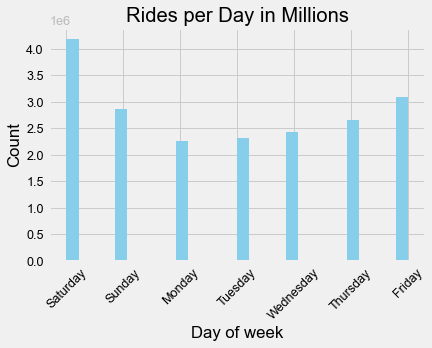

In [29]:
fig = plt.figure()
plt.hist(df['day_name'], bins = 28, color = "skyblue", lw=0)
plt.xlabel('Day of week', color = 'black')
plt.ylabel('Count', color = 'black')
plt.xticks(rotation = 45, color = 'black')
plt.yticks(color = 'black')
plt.title('Rides per Day in Millions',color = 'black')
plt.show()

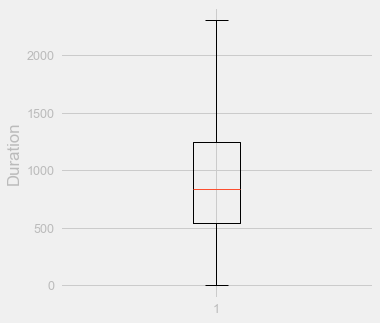

In [14]:
fig = plt.figure(figsize = (5,5))

plt.boxplot(df['Duration (seconds)'])
plt.ylabel('Duration')

plt.show()

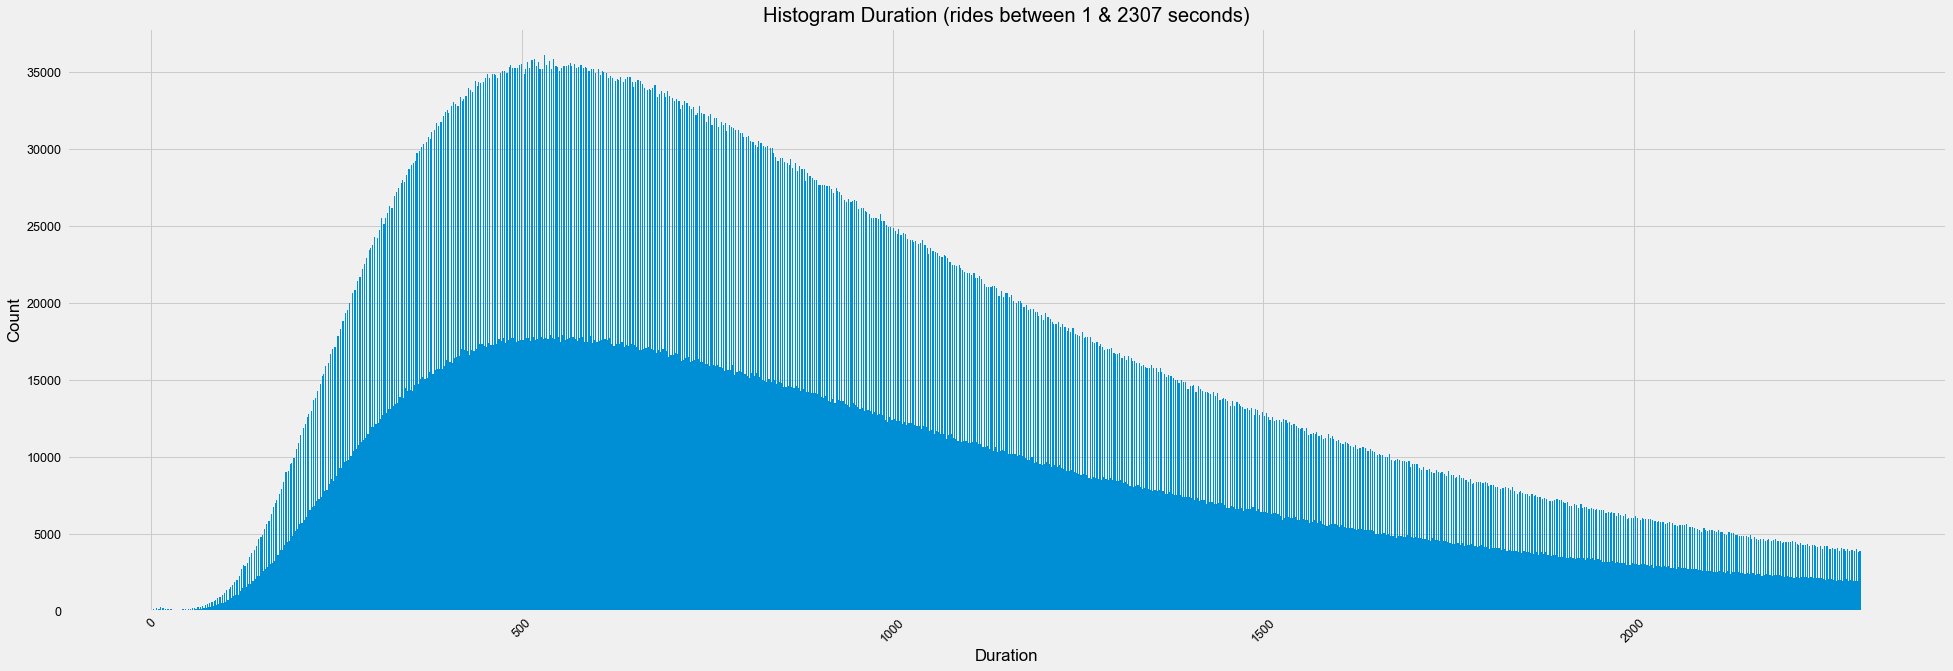

In [30]:
fig = plt.figure(figsize = (30,10))

plt.hist(df['Duration (seconds)'], bins = 1500)
plt.xlabel('Duration', color = 'black')
plt.ylabel('Count', color = 'black')
plt.xticks(rotation = 45, color = 'black')
plt.yticks(color = 'black')
plt.title('Histogram Duration (rides between 1 & 2307 seconds)',color = 'black')

plt.show()

In [13]:
df['Duration (seconds)'].mean()

1063.3776499876985

In [14]:
len(df)

21724865

In [16]:
df = pd.get_dummies(df)

#df.iloc[:,5:].head
df

,pickup_datetime,Duration (seconds),year,month,day,day_of_week,hour,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,provider_Lyft,provider_Uber
0,2020-02-01 00:06:20,321.0,2020,2,1,5,0,0,0,1,0,0,0,0,0,1
1,2020-02-01 00:27:49,1128.0,2020,2,1,5,0,0,0,1,0,0,0,0,0,1
2,2020-02-01 00:47:37,940.0,2020,2,1,5,0,0,0,1,0,0,0,0,0,1
3,2020-02-01 00:10:26,1471.0,2020,2,1,5,0,0,0,1,0,0,0,0,0,1
4,2020-02-01 00:48:56,521.0,2020,2,1,5,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21724860,2020-02-29 23:22:11,470.0,2020,2,29,5,23,0,0,1,0,0,0,0,0,1
21724861,2020-02-29 23:32:04,408.0,2020,2,29,5,23,0,0,1,0,0,0,0,0,1
21724862,2020-02-29 23:43:58,1013.0,2020,2,29,5,23,0,0,1,0,0,0,0,0,1
21724863,2020-02-29 23:11:55,532.0,2020,2,29,5,23,0,0,1,0,0,0,0,0,1


In [17]:
# Randomly select n rows from df to reduce training / testing time
dfSub = df.sample(n=1000000,random_state=42)

In [18]:
# labels = value we want to predict
labels = np.array(dfSub['Duration (seconds)'])

#remove labels from set
dfSub = dfSub.drop('Duration (seconds)', axis = 1)

df_list = list(dfSub.columns)

dfSub = np.array(dfSub)

In [19]:
train_df, test_df, train_labels, test_labels = split(dfSub, labels, test_size = 0.25, random_state = 42)

print('Training df Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)

Training df Shape: (750000, 15)
Training Labels Shape: (750000,)
Testing df Shape: (250000, 15)
Testing Labels Shape: (250000,)


In [22]:
# The baseline predictions are the historical averages
baseline_preds = test_df[:, df_list.index('mean_seconds')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  440.02


In [23]:
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_df, train_labels);

In [24]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'seconds.')

Mean Absolute Error: 235.35 seconds.


In [25]:
# Calculate mean absolute percentage error (MAPE)
mape =  100 * (errors / test_labels) 
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 66.48 %.


Looking at accuracy using Median values as baseline. 

In [26]:
# The baseline predictions are the historical averages
baseline_preds = test_df[:, df_list.index('median_seconds')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.median(baseline_errors), 2))

Average baseline error:  353.0


In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.median(errors), 2), 'seconds.')

Mean Absolute Error: 182.87 seconds.


In [28]:
# Calculate mean absolute percentage error (MAPE)
mape =  100 * (errors / test_labels) 
# Calculate and display accuracy
accuracy = 100 - np.median(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 77.97 %.
